In [1]:
import numpy as np
import matplotlib.pyplot as plt
# NOTE: Install pandas first, for loading csv data
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    line2 = np.linspace(np.min(pred_target),np.max(pred_target),10)
    
    plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # residuals
    plt.figure(figsize=(8,6))
    residual = np.array(test_target) - np.array(pred_target)
    plt.scatter(pred_target,residual)
    plt.plot(line2, np.linspace(0,0,10),'r--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual")
    plt.show()

In [3]:
insur_dataset = pd.read_csv('insurance_data.csv')
insur_dataset.columns = ['ft1','ft2','ft3','ft4','ft5','ft6','charges']
print (insur_dataset)

      ft1     ft2  ft3     ft4  ft5        ft6      charges
0      19  27.900    0  female  yes  southwest  16884.92400
1      18  33.770    1    male   no  southeast   1725.55230
2      28  33.000    3    male   no  southeast   4449.46200
3      33  22.705    0    male   no  northwest  21984.47061
4      32  28.880    0    male   no  northwest   3866.85520
5      31  25.740    0  female   no  southeast   3756.62160
6      46  33.440    1  female   no  southeast   8240.58960
7      37  27.740    3  female   no  northwest   7281.50560
8      37  29.830    2    male   no  northeast   6406.41070
9      60  25.840    0  female   no  northwest  28923.13692
10     25  26.220    0    male   no  northeast   2721.32080
11     62  26.290    0  female  yes  southeast  27808.72510
12     23  34.400    0    male   no  southwest   1826.84300
13     56  39.820    0  female   no  southeast  11090.71780
14     27  42.130    0    male  yes  southeast  39611.75770
15     19  24.600    1    male   no  sou

### Fature Encoding ###

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


# # Scalar encoding for each catagorical variable ft4 ft5 ft6
ft4_label, ft4_unique = pd.factorize(insur_dataset['ft4'],sort=True)
ft5_label, ft5_unique = pd.factorize(insur_dataset['ft5'],sort=True)
ft6_label, ft6_unique = pd.factorize(insur_dataset['ft6'],sort=True)

# Create Scalar encoded dataset (All coding start with 1)
insur_dataset_scalar = insur_dataset.copy()
insur_dataset_scalar['ft4'] = ft4_label+1
insur_dataset_scalar['ft5'] = ft5_label+1
insur_dataset_scalar['ft6'] = ft6_label+1
ftOHE=insur_dataset_scalar[['ft1','ft2','ft3','ft4','ft5','ft6']]
y=insur_dataset_scalar['charges']
ct = ColumnTransformer(
    [('oh_enc', PolynomialFeatures(degree=3, interaction_only=False, include_bias=True), [0,1,2,3,4,5]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)



X_a = ct.fit_transform(ftOHE)
# print(X_a.shape)
# print(X_a)
# print(X_a[0])

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

reg = LinearRegression(fit_intercept = False)

# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X_a, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X_a, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)

RMSE of training dateset:  4606.0487959050815
RMSE of testing dateset:  4881.338043465336


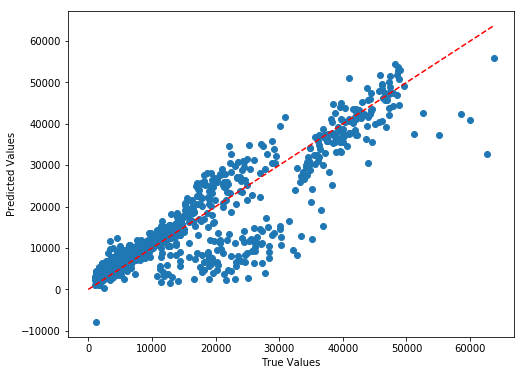

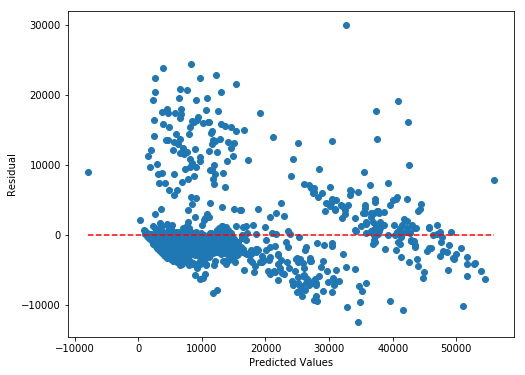

In [6]:
plotPred(y,predict)

### Random Forest Regressor ###

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

a = 0
b = 0
train_RMSE = 0
test_RMSE_min = 10000
predict_final = []
n = 0

for i in range(50,300,20):
    for j in range(1,6):
        reg = RandomForestRegressor(max_depth=j, random_state=0,n_estimators=i)
        scores = cross_validate(reg, X_a, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True)
        predict = cross_val_predict(reg, X_a, y, cv=10)
        test_score = np.sqrt(np.mean(-scores['test_score']))
        train_score = np.sqrt(np.mean(-scores['train_score']))
        n = n+1
        print(n)
        if test_score < test_RMSE_min:
            test_RMSE_min = test_score
            train_RMSE = train_score
            a = i
            b = j
            predict_final = predict

print(a)
print(b)
print(train_RMSE)
print(test_RMSE_min)

# print('RMSE of training dateset: ', train_score)
# print('RMSE of testing dateset: ', test_score)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
210
4
4161.0694116343275
4512.420258345598


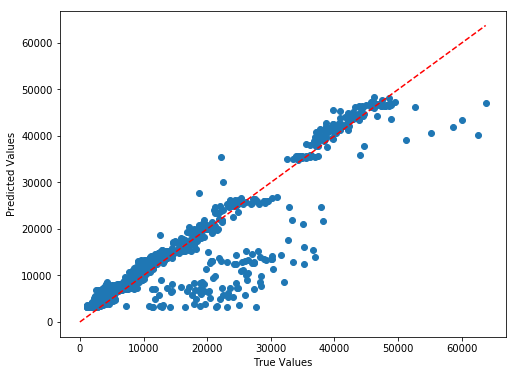

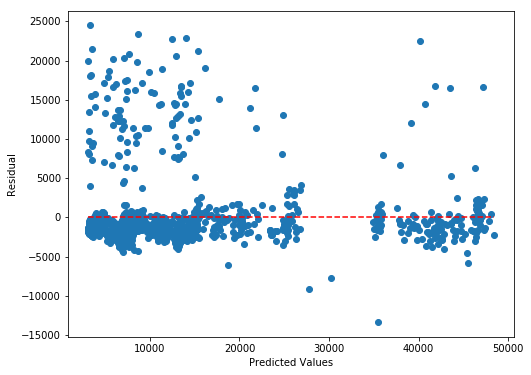

In [8]:
plotPred(y,predict_final)

### Neural Network ###

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

num_hidden = [2,5,10]
a = 0
b = 0
train_RMSE = 0
test_RMSE_min = 10000
predict_final = []
n = 0

for i in range(1000,3000,200):
    for j in num_hidden:
        reg = MLPRegressor(max_iter= i,hidden_layer_sizes=j)

        # 10-fold cross validation for scalar encoding dataset
        scores = cross_validate(reg, X_a, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True)
        predict = cross_val_predict(reg, X_a, y, cv=10)
        test_score = np.sqrt(np.mean(-scores['test_score']))
        train_score = np.sqrt(np.mean(-scores['train_score']))
        n = n+1
        print(n)
        if test_score < test_RMSE_min:
            test_RMSE_min = test_score
            train_RMSE = train_score
            a = i
            b = j
            predict_final = predict

print(a)
print(b)
print(train_RMSE)
print(test_RMSE_min)
# print('RMSE of training dateset: ', train_score)
# print('RMSE of testing dateset: ', test_score)

C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

1
2
3


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

4
5
6


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7
8
9


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

10


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


11
12


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

13
14
15


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

16
17
18


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

19


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20
21


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

22
23
24


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


25


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


26
27


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2800) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

28


C:\Users\xxue4\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


29
30
2800
10
5329.89564889816
5394.342456052099


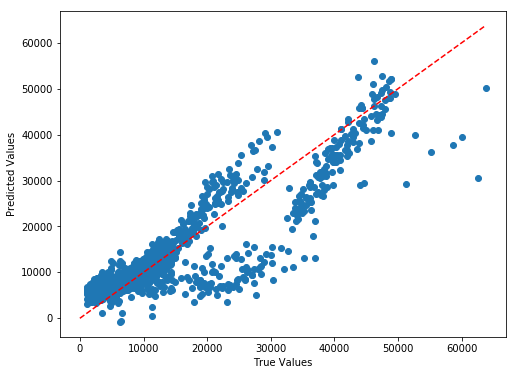

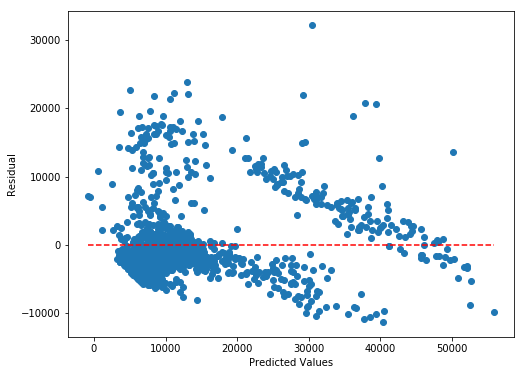

In [10]:
plotPred(y,predict_final)

### Gradient Boosting Regressor ###

In [11]:
from sklearn.ensemble import GradientBoostingRegressor


a = 0
b = 0
train_RMSE = 0
test_RMSE_min = 10000
predict_final = []
n = 0

for i in range(1,11,2):
    for j in range(50,300,50):
        reg = GradientBoostingRegressor(learning_rate=i/10,n_estimators=j)


        # default
        # RMSE of training dateset:  3237.0942210848525
        # RMSE of testing dateset:  4664.364955098374

        # setting: loss='ls',learning_rate=0.1,max_depth = None
        # RMSE of training dateset:  416.6647029838836
        # RMSE of testing dateset:  6238.191607069017


        # 10-fold cross validation for scalar encoding dataset
        scores = cross_validate(reg, X_a, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True)
        predict = cross_val_predict(reg, X_a, y, cv=10)
        test_score = np.sqrt(np.mean(-scores['test_score']))
        train_score = np.sqrt(np.mean(-scores['train_score']))
        n = n+1
        print(n)
        if test_score < test_RMSE_min:
            test_RMSE_min = test_score
            train_RMSE = train_score
            a = i
            b = j
            predict_final = predict

            
print(a)
print(b)
print(train_RMSE)
print(test_RMSE_min)
# print('RMSE of training dateset: ', train_score)
# print('RMSE of testing dateset: ', test_score)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
1
50
3773.4622875009254
4532.917966376073


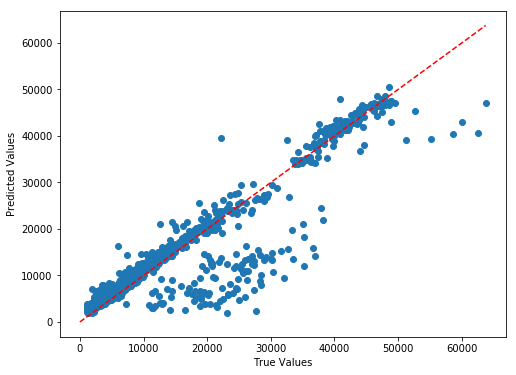

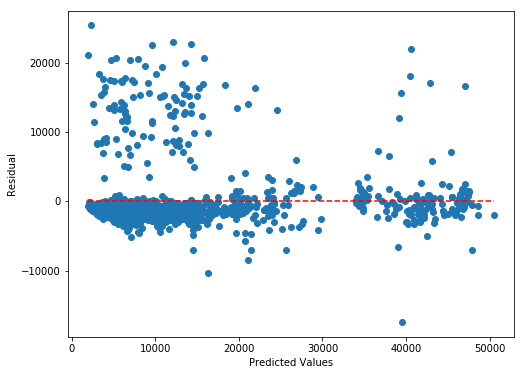

In [12]:
plotPred(y,predict_final)